# Health Insurance Cost Prediction Using GUI

In [1]:
import pandas as pd

# Load csv File

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Find shape of our dataset

In [3]:
df.shape

(1338, 7)

In [4]:
print("Number of rows : ",df.shape[0])
print("Number of columns : ",df.shape[1])

Number of rows :  1338
Number of columns :  7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Convert string columns into int

In [8]:
# Converting sex column into integer
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex']= df['sex'].map({'female':0,'male':1})
df.head()
# if ur getting NaN values in dataset after running the command please refresh or runn all cells again

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [10]:
# Converting smoker column into integer
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['smoker'] = df["smoker"].map({"yes":1,"no":0})
df.head()
# if ur getting NaN values in dataset after running the command please refresh or runn all cells again

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [12]:
# Converting region column into integer
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df['region'] = df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df.head()
# if ur getting NaN values in dataset after running the command please refresh or runn all cells again

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# Store feature ***matrix in X*** and Response or Target in **vector y**.
Here why we use **capital X** bec's X is a feature **matrix** ,
and here why we use **lowcase y** bec's y is a **vector** .

In [14]:
# check all column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
X = df.drop('charges',axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [16]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# **Train Test Split**

# 1. Split data into two parts : a training set and a testing set

# 2. Train the model on training set

# 3. Test the model on testing set


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 42)

In [19]:
X_train
#  if u run this shell many time then each time u will get random values but if u want to set constant values then use random state = 42 or any value u want in train_test_split script.

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [20]:
y_train
#  if u run this command many time then each time u will get random values but if u want to set constant values then use random state = 42 or any value u want in train_test_split script.

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# Import the models

In [21]:
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.svm import SVR # for support vector machine
from sklearn.ensemble import RandomForestRegressor # for random forest regressor
from sklearn.ensemble import GradientBoostingRegressor # for gradient boosting regressor

In [22]:
# fit model for linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

#fit model for Suport vector machine
svm =SVR()
svm.fit(X_train,y_train)

# fit model for Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

#fit model for Gradient Boosting
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

# Prediction on Test Data

In [23]:
# predict for linear regression
y_pred1 = lr.predict(X_test)

# predict for Suport vector machine
y_pred2 = svm.predict(X_test)

# predict for Random Forest
y_pred3 = rf.predict(X_test)

# predict for Gradient Boosting
y_pred4 = gr.predict(X_test)

In [24]:
# now stoire this values in new dataframe called df1

df1 = pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})
df1


,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11175.888285,11001.128629
887,5272.17580,7116.295018,9492.515425,5045.541533,5840.174656
890,29330.98315,36909.013521,9648.758701,28301.261649,28001.980112
1293,9301.89355,9507.874691,9555.044136,10176.615714,9745.291602
259,33750.29180,27013.350008,9420.421978,34405.611833,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47159.715379,45431.423211
575,12222.89830,11814.555568,9625.431547,12772.851989,12465.025294
535,6067.12675,7638.107736,9504.168517,6368.594155,6974.336525
543,63770.42801,40959.081722,9605.004594,46748.839977,47862.047791


# Compare performance vissually

In [25]:
# Now we have to find best model that nearest to actual value thatswhy we want to visuallize the dataframe to see the accuracy
import matplotlib.pyplot as plt

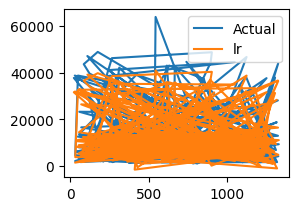

In [26]:
# now we want to plot actual values and lr values to visualize the plot

plt.subplot(221)  # here 221 means "2" for 2nd row , "2" for 2nd column and "1" for position of plot
plt.plot(df1['Actual'],label = 'Actual')
plt.plot(df1['lr'],label = 'lr')
plt.legend() # menu bar in plotgraph



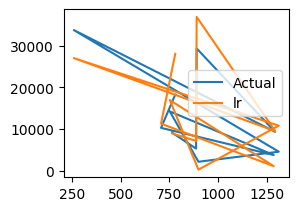

In [27]:
# now here is very difficult to diffrenciate actual values and predicted values then we can use only first 10 values to plot

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['lr'].iloc[0:11],label = 'lr')
plt.legend()

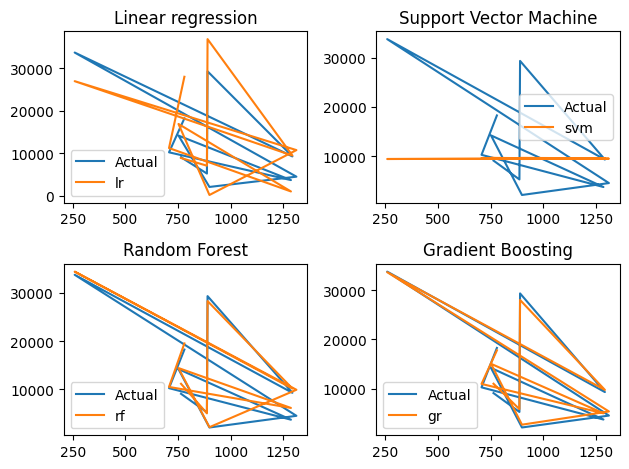

In [28]:
# now we can easily find the diffrence .
# now use this for all models

#linear regression
plt.subplot(221)
plt.title('Linear regression')
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['lr'].iloc[0:11],label = 'lr')
plt.legend()

# SVM
plt.subplot(222)
plt.title('Support Vector Machine')
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['svm'].iloc[0:11],label = 'svm')
plt.legend()

# random forest
plt.subplot(223)
plt.title('Random Forest')
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['rf'].iloc[0:11],label = 'rf')
plt.legend()


# gradient boosting
plt.subplot(224)
plt.title('Gradient Boosting')
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['gr'].iloc[0:11],label = 'gr')
plt.legend()

plt.tight_layout() # to give appropriate spacing between  two plots

In [29]:
# Now here we can see the all diffrences of actual values and model values
# so now we find Random forest and Gradient Boosting model is very closer to actual values.

# Evaluating the algorithm

In [30]:
from sklearn import metrics

# now find r_score of all models

In [31]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

print("Score value for linear regression :",score1 )
print("Score value for Support vector machine:",score2 )
print("Score value for random Forest :",score3)
print("Score value for gradient boosting :",score4 )

Score value for linear regression : 0.7833463107364539
Score value for Support vector machine: -0.07229762787861826
Score value for random Forest : 0.8688468658051111
Score value for gradient boosting : 0.8779726251291786


# now find absolute mean error of all models

In [32]:
ame1 = metrics.mean_absolute_error(y_test,y_pred1)
ame2 = metrics.mean_absolute_error(y_test,y_pred2)
ame3 = metrics.mean_absolute_error(y_test,y_pred3)
ame4 = metrics.mean_absolute_error(y_test,y_pred4)

print("Absolute Mean Error for Linear regression :" , ame1)
print("Absolute Mean Error for Support Vector Machine :" , ame2)
print("Absolute Mean Error for random forest :" , ame3)
print("Absolute Mean Error for gradient boosting :" , ame4)

Absolute Mean Error for Linear regression : 4186.508898366434
Absolute Mean Error for Support Vector Machine : 8592.428727899724
Absolute Mean Error for random forest : 2430.893606830753
Absolute Mean Error for gradient boosting : 2447.9515580545844


# Now predict charges for new customers data

In [33]:
 # make new dataframe for new customer
customer = {'age' :23,
        'sex' :1,
        'bmi' :40.30,
        'children' : 2,
        'smoker' :0,
        'region' :2
       }

df2 = pd.DataFrame(customer,index = [0])
df2

,age,sex,bmi,children,smoker,region
0,23,1,40.3,2,0,2


# predict on new data

In [34]:
# now we created new data then predict on this data

new_pred = gr.predict(df2) # here we use gr.predict bec's we see the best model is gradient boosting in visualized plots
print("Charges :",new_pred)

Charges : [6083.70011309]


# Now Save Model Using Joblib

We need more accuracy , first we train model on only X_train and y_train  for more accuracy now we train data on entire dataset

In [35]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [36]:
import joblib
joblib.dump(gr,'model_joblib_gr') # here we passing " model_joblib_gr " to save model by this name

['model_joblib_gr']

In [37]:
model = joblib.load('model_joblib_gr') # now model succsessfully loaded

In [38]:
# now we can predict on newly created df2 dataframe
predict = model.predict(df2)
print ("Predicted Charges : ",predict) # this is more accurate than train sets

Predicted Charges :  [5466.10337268]
